In [1]:
import requests
import lxml.html as lh
import pandas as pd

In [47]:
WHO_url = 'https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease'
page = requests.get(WHO_url)
doc = lh.fromstring(page.content)
tr_elements= doc.xpath('//tr')
[len(T) for T in tr_elements [:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [54]:
tr_elements = doc.xpath('//tr')
col = []
i = 0
for t in tr_elements [0]:
    i+=1
    name=t.text_content()
    print ("%d:%s" % (i,name))
    col.append((name, []))

1:Year
2:Country
3:EVD
4:Cases
5:Deaths
6:Case fatality 


In [58]:
for j in range(1,len(tr_elements)): 
    T = tr_elements[j] 
    
    if len(T)!=7: 
        break
        
    i = 0 
    
    for t in T.iterchildren(): 
        data=t.text_content()
            
        col[i][1].append(data) 
            
        i+=1 

In [59]:
[len(C) for (title,C) in col]

[41, 41, 41, 41, 41, 41]

In [60]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [61]:
df.head(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%
5,2017,Democratic Republic of the Congo,Zaire,8,4,50%
6,2015,Italy,Zaire,1,0,0%
7,2014,Spain,Zaire,1,0,0%
8,2014,UK,Zaire,1,0,0%
9,2014,USA,Zaire,4,1,25%


In [62]:
df.tail(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
31,1996,South Africa (ex-Gabon),Zaire,1,1,100%
32,1996 (Jul-Dec),Gabon,Zaire,60,45,75%
33,1996 (Jan-Apr),Gabon,Zaire,31,21,68%
34,1995,Democratic Republic of the Congo,Zaire,315,254,81%
35,1994,Côte d'Ivoire,Taï Forest,1,0,0%
36,1994,Gabon,Zaire,52,31,60%
37,1979,Sudan,Sudan,34,22,65%
38,1977,Democratic Republic of the Congo,Zaire,1,1,100%
39,1976,Sudan,Sudan,284,151,53%
40,1976,Democratic Republic of the Congo,Zaire,318,280,88%


In [63]:
df = df.replace(',', '', regex=True)
df = df.replace('%', '', regex=True)

In [64]:
df.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66
4,2018,Democratic Republic of the Congo,Zaire,54,33,61


In [65]:
df.shape

(41, 6)

In [66]:
df1=df.rename(columns={'Case fatality': 'Fatality'})
df1.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66
4,2018,Democratic Republic of the Congo,Zaire,54,33,61


In [68]:
df1.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66
4,2018,Democratic Republic of the Congo,Zaire,54,33,61


In [69]:
df1 = df1.replace(',', '', regex=True)

In [70]:
df1.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66
4,2018,Democratic Republic of the Congo,Zaire,54,33,61


In [71]:
df1.describe()

,Year,Country,EVD,Cases,Deaths,Case fatality
count,41,41,41,41,41,41
unique,28,20,7,33,31,27
top,2014,Democratic Republic of the Congo,Zaire,1,0,0
freq,6,9,25,8,5,5


In [299]:
df1.corr()

""


In [72]:
df1.dtypes

Year              object
Country           object
EVD               object
Cases             object
Deaths            object
Case fatality     object
dtype: object

In [74]:
cdf=df1[['Year', 'Country', 'EVD', 'Cases','Deaths' ]]
cdf.head()

,Year,Country,EVD,Cases,Deaths
0,2021,Guinea,Zaire,Ongoing,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,
2,2020,Democratic Republic of the Congo,Zaire,130,55
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299
4,2018,Democratic Republic of the Congo,Zaire,54,33


In [86]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [87]:
cdf["Year"]=pd.to_numeric(df1["Year"],errors='ignore')
cdf["Country"]=pd.to_numeric(df1["Country"],errors='ignore')
cdf["EVD"]=pd.to_numeric(df1["EVD"],errors='ignore')
cdf["Cases"]=pd.to_numeric(df1["Cases"],errors='ignore')
cdf["Deaths"]=pd.to_numeric(df1["Deaths"],errors='ignore')

In [88]:
cdf.dtypes

Year       object
Country    object
EVD        object
Cases      object
Deaths     object
dtype: object

In [89]:
cdf.head()

,Year,Country,EVD,Cases,Deaths
0,2021,Guinea,Zaire,Ongoing,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,
2,2020,Democratic Republic of the Congo,Zaire,130,55
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299
4,2018,Democratic Republic of the Congo,Zaire,54,33


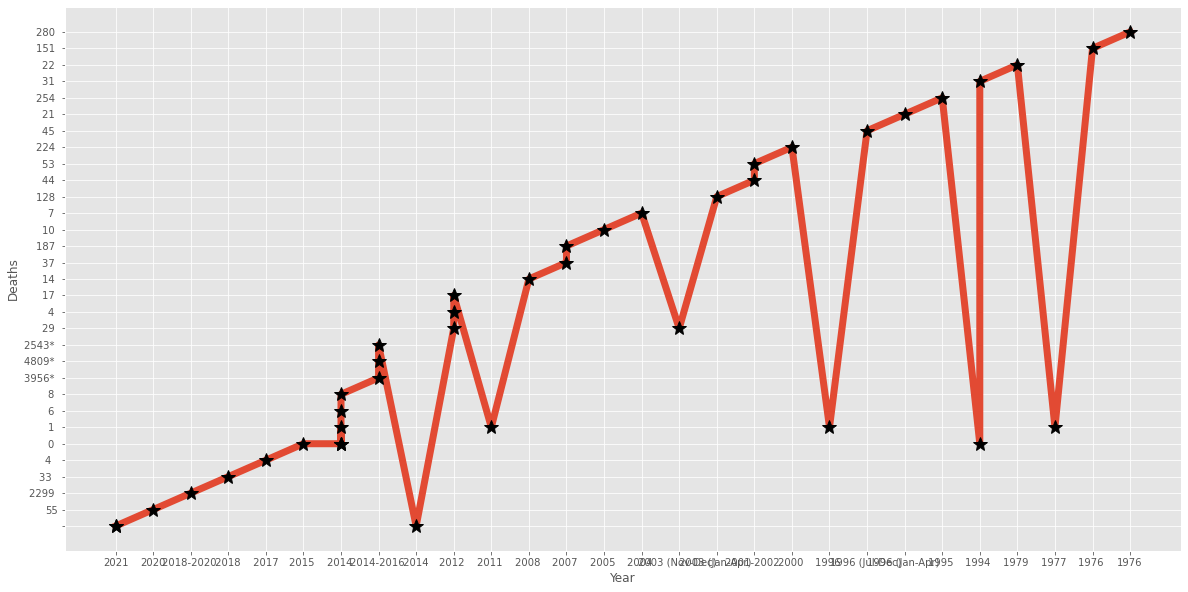

In [91]:
plt.figure(figsize = (20,10))

x = cdf.Year
y = cdf.Deaths

plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')


plt.xlabel('Year')
plt.ylabel('Deaths')

plt.rcParams.update({'font.size': 26})
plt.show()

In [97]:
cdf.dtypes

Year       object
Country    object
EVD        object
Cases      object
Deaths     object
dtype: object

In [105]:
cdf.head()

,Year,Country,EVD,Cases,Deaths
0,2021,Guinea,Zaire,Ongoing,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,
2,2020,Democratic Republic of the Congo,Zaire,130,55
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299
4,2018,Democratic Republic of the Congo,Zaire,54,33


In [106]:
cdf = cdf.drop(labels=0, axis=0)

In [111]:
cdf.head(41)

,Year,Country,EVD,Cases,Deaths
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,
2,2020,Democratic Republic of the Congo,Zaire,130,55
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299
4,2018,Democratic Republic of the Congo,Zaire,54,33
5,2017,Democratic Republic of the Congo,Zaire,8,4
6,2015,Italy,Zaire,1,0
7,2014,Spain,Zaire,1,0
8,2014,UK,Zaire,1,0
9,2014,USA,Zaire,4,1
10,2014,Senegal,Zaire,1,0


In [113]:
cdf = cdf.replace('-', '', regex=True)
#cdf = cdf.replace('*', '', regex=True)

In [120]:
cdf.head(41)

,Year,Country,EVD,Cases,Deaths
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,
2,2020,Democratic Republic of the Congo,Zaire,130,55
3,20182020,Democratic Republic of the Congo,Zaire,3481,2299
4,2018,Democratic Republic of the Congo,Zaire,54,33
5,2017,Democratic Republic of the Congo,Zaire,8,4
6,2015,Italy,Zaire,1,0
7,2014,Spain,Zaire,1,0
8,2014,UK,Zaire,1,0
9,2014,USA,Zaire,4,1
10,2014,Senegal,Zaire,1,0


In [124]:
#cdf = cdf.drop(labels=26, axis=0)
#cdf = cdf.drop(labels=27, axis=0)
#cdf = cdf.drop(labels=32, axis=0)
cdf = cdf.drop(labels=3, axis=0)
cdf = cdf.drop(labels=16, axis=0)
cdf = cdf.drop(labels=13, axis=0)
cdf = cdf.drop(labels=14, axis=0)
cdf = cdf.drop(labels=15, axis=0)
cdf = cdf.drop(labels=28, axis=0)
cdf = cdf.drop(labels=29, axis=0)


In [132]:
cdf = cdf.drop(labels=1, axis=0)

In [135]:
cdf = cdf.astype({'Year':'int'})
#cdf = cdf.astype({'Country':'int'})
#cdf = cdf.astype({'EVD':'int'})
cdf = cdf.astype({'Cases':'int'})
cdf = cdf.astype({'Deaths':'int'})

In [136]:
cdf.dtypes

Year        int32
Country    object
EVD        object
Cases       int32
Deaths      int32
dtype: object

In [300]:
cdf.corr()

,Year,Cases,Year_n,Country_n,EVD_n,Cases_n,Deaths
Year,1.000000,-0.402559,0.964739,0.086942,0.164952,-0.321317,-0.343707
Cases,-0.402559,1.000000,-0.421488,-0.029780,-0.166828,0.877383,0.867923
Year_n,0.964739,-0.421488,1.000000,0.073152,0.208093,-0.321169,-0.341342
Country_n,0.086942,-0.029780,0.073152,1.000000,-0.530563,-0.138607,-0.189233
EVD_n,0.164952,-0.166828,0.208093,-0.530563,1.000000,-0.247868,-0.182669
Cases_n,-0.321317,0.877383,-0.321169,-0.138607,-0.247868,1.000000,0.987800
Deaths,-0.343707,0.867923,-0.341342,-0.189233,-0.182669,0.987800,1.000000


The slope of line is -2.8168086952085023.
The y intercept is 5694.767398800212.
The best fit simple linear regression line is -2.8168086952085023x + 5694.767398800212.


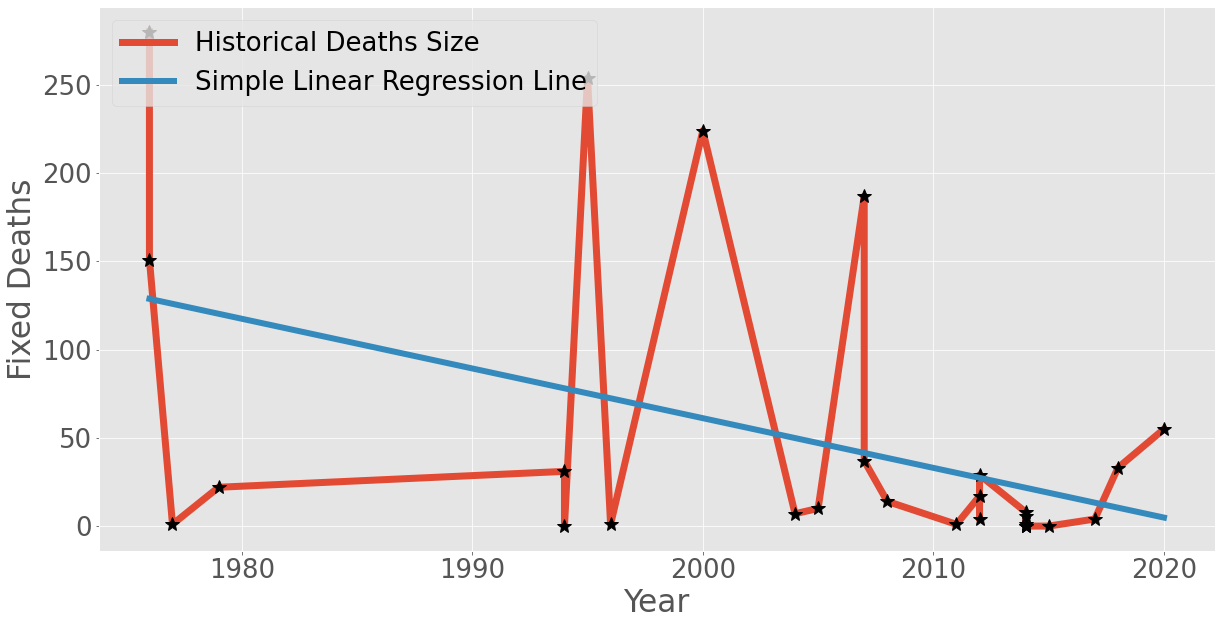

In [138]:
plt.figure(figsize = (20,10))

order = 1

x = cdf.Year
y = cdf.Deaths

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Deaths Size', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))

plt.xlabel('Year')
plt.ylabel('Fixed Deaths')
plt.legend(loc = 'upper left')

plt.rcParams.update({'font.size': 26})
plt.show()

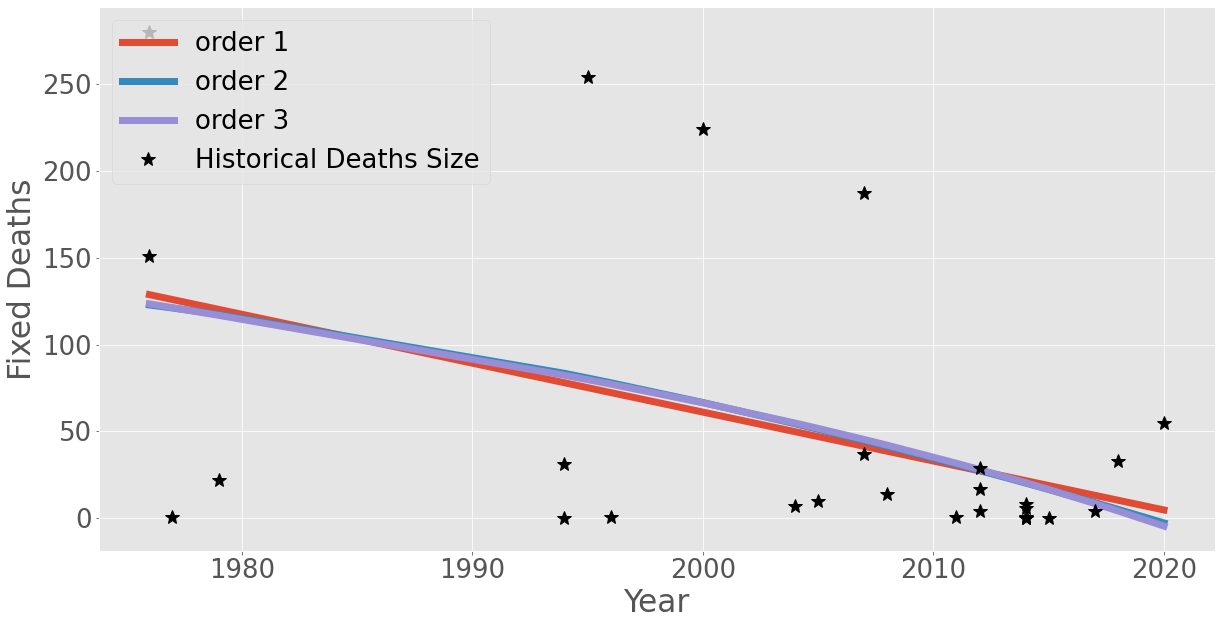

In [139]:
models = []       
errors_hist = []  
mse_hist = []     

for order in range(1,4):
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Deaths Size', linewidth = 7)
plt.legend(loc = 'upper left')

plt.xlabel('Year')
plt.ylabel('Fixed Deaths')

plt.show()

In [297]:
from scipy.optimize import curve_fit
xx = cdf.Year   
xy = cdf.Deaths

def exp_func(x,a,b):
    return a*b**x

#popt, pcov = curve_fit(exp_func,xx,xy)
#yr_predict = exp_func(xx,popt[0],popt[1])

<AxesSubplot:>

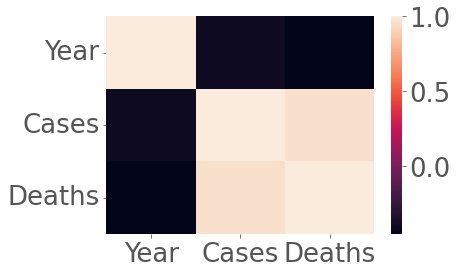

In [144]:
# Code cell 12
import seaborn as sns

wcorr = cdf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

</b> Question Four</b>

In [147]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [148]:
cdf.shape

(28, 5)

In [151]:
cdf.head()

,Year,Country,EVD,Cases,Deaths
2,2020,Democratic Republic of the Congo,Zaire,130,55
4,2018,Democratic Republic of the Congo,Zaire,54,33
5,2017,Democratic Republic of the Congo,Zaire,8,4
6,2015,Italy,Zaire,1,0
7,2014,Spain,Zaire,1,0


In [155]:
X =cdf[["Year","Country","EVD", "Cases"]].values
X[0:4]

array([[2020, 'Democratic Republic of the Congo', 'Zaire', 130],
       [2018, 'Democratic Republic of the Congo ', 'Zaire\xa0 ', 54],
       [2017, 'Democratic Republic of the Congo\xa0 ', 'Zaire\xa0 ', 8],
       [2015, 'Italy ', 'Zaire ', 1]], dtype=object)

In [156]:
y =cdf["Deaths"]
y[0:4]

2    55
4    33
5     4
6     0
Name: Deaths, dtype: int32

In [157]:
cdf

,Year,Country,EVD,Cases,Deaths
2,2020,Democratic Republic of the Congo,Zaire,130,55
4,2018,Democratic Republic of the Congo,Zaire,54,33
5,2017,Democratic Republic of the Congo,Zaire,8,4
6,2015,Italy,Zaire,1,0
7,2014,Spain,Zaire,1,0
8,2014,UK,Zaire,1,0
9,2014,USA,Zaire,4,1
10,2014,Senegal,Zaire,1,0
11,2014,Mali,Zaire,8,6
12,2014,Nigeria,Zaire,20,8


In [162]:
from sklearn.preprocessing import LabelEncoder
le_Year = LabelEncoder()
le_Country = LabelEncoder()
le_EVD = LabelEncoder()
le_Cases = LabelEncoder()

In [164]:
cdf['Year_n'] = le_Year.fit_transform(cdf['Year'])
cdf['Country_n'] = le_Country.fit_transform(cdf['Country'])
cdf['EVD_n'] = le_EVD.fit_transform(cdf['EVD'])
cdf['Cases_n'] = le_Cases.fit_transform(cdf['Cases'])

In [165]:
cdf

,Year,Country,EVD,Cases,Deaths,Year_n,Country_n,EVD_n,Cases_n
2,2020,Democratic Republic of the Congo,Zaire,130,55,17,2,3,13
4,2018,Democratic Republic of the Congo,Zaire,54,33,16,3,5,11
5,2017,Democratic Republic of the Congo,Zaire,8,4,15,4,5,3
6,2015,Italy,Zaire,1,0,14,6,4,0
7,2014,Spain,Zaire,1,0,13,11,4,0
8,2014,UK,Zaire,1,0,13,13,4,0
9,2014,USA,Zaire,4,1,13,14,4,1
10,2014,Senegal,Zaire,1,0,13,9,4,0
11,2014,Mali,Zaire,8,6,13,7,4,3
12,2014,Nigeria,Zaire,20,8,13,8,4,6


In [167]:
X =cdf[["Year","Country", "EVD", "Cases"]].values
X[0:4]

array([[2020, 'Democratic Republic of the Congo', 'Zaire', 130],
       [2018, 'Democratic Republic of the Congo ', 'Zaire\xa0 ', 54],
       [2017, 'Democratic Republic of the Congo\xa0 ', 'Zaire\xa0 ', 8],
       [2015, 'Italy ', 'Zaire ', 1]], dtype=object)

In [168]:
y =cdf["Deaths"]
y[0:4]

2    55
4    33
5     4
6     0
Name: Deaths, dtype: int32

In [169]:
from sklearn import preprocessing

In [170]:
cdf.head(15)

,Year,Country,EVD,Cases,Deaths,Year_n,Country_n,EVD_n,Cases_n
2,2020,Democratic Republic of the Congo,Zaire,130,55,17,2,3,13
4,2018,Democratic Republic of the Congo,Zaire,54,33,16,3,5,11
5,2017,Democratic Republic of the Congo,Zaire,8,4,15,4,5,3
6,2015,Italy,Zaire,1,0,14,6,4,0
7,2014,Spain,Zaire,1,0,13,11,4,0
8,2014,UK,Zaire,1,0,13,13,4,0
9,2014,USA,Zaire,4,1,13,14,4,1
10,2014,Senegal,Zaire,1,0,13,9,4,0
11,2014,Mali,Zaire,8,6,13,7,4,3
12,2014,Nigeria,Zaire,20,8,13,8,4,6


In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
le = LabelEncoder()

In [173]:
label = le.fit_transform(cdf['Deaths'])

In [174]:
label

array([14, 12,  2,  0,  0,  0,  1,  0,  3,  5, 10,  2,  8,  1,  7, 13, 16,
        6,  4, 17,  1, 18,  0, 11,  9,  1, 15, 19], dtype=int64)

In [175]:
cdf.drop("Deaths", axis=1, inplace=True)

In [176]:
cdf["Deaths"] = label

In [177]:
cdf

,Year,Country,EVD,Cases,Year_n,Country_n,EVD_n,Cases_n,Deaths
2,2020,Democratic Republic of the Congo,Zaire,130,17,2,3,13,14
4,2018,Democratic Republic of the Congo,Zaire,54,16,3,5,11,12
5,2017,Democratic Republic of the Congo,Zaire,8,15,4,5,3,2
6,2015,Italy,Zaire,1,14,6,4,0,0
7,2014,Spain,Zaire,1,13,11,4,0,0
8,2014,UK,Zaire,1,13,13,4,0,0
9,2014,USA,Zaire,4,13,14,4,1,1
10,2014,Senegal,Zaire,1,13,9,4,0,0
11,2014,Mali,Zaire,8,13,7,4,3,3
12,2014,Nigeria,Zaire,20,13,8,4,6,5


In [178]:
inputs = cdf.drop('Deaths',axis='columns')

In [179]:
target = cdf['Deaths']

In [180]:
from sklearn.preprocessing import LabelEncoder
le_Year = LabelEncoder()
le_Country = LabelEncoder()
le_EVD = LabelEncoder()
le_Cases = LabelEncoder()

In [181]:
inputs['Year_n'] = le_Year.fit_transform(inputs['Year'])
inputs['Country_n'] = le_Country.fit_transform(inputs['Country'])
inputs['EVD_n'] = le_EVD.fit_transform(inputs['EVD'])
inputs['Cases_n'] = le_Cases.fit_transform(inputs['Cases'])

In [182]:
inputs

,Year,Country,EVD,Cases,Year_n,Country_n,EVD_n,Cases_n
2,2020,Democratic Republic of the Congo,Zaire,130,17,2,3,13
4,2018,Democratic Republic of the Congo,Zaire,54,16,3,5,11
5,2017,Democratic Republic of the Congo,Zaire,8,15,4,5,3
6,2015,Italy,Zaire,1,14,6,4,0
7,2014,Spain,Zaire,1,13,11,4,0
8,2014,UK,Zaire,1,13,13,4,0
9,2014,USA,Zaire,4,13,14,4,1
10,2014,Senegal,Zaire,1,13,9,4,0
11,2014,Mali,Zaire,8,13,7,4,3
12,2014,Nigeria,Zaire,20,13,8,4,6


In [183]:
inputs_n = inputs.drop(['Year','Country','EVD', 'Cases'],axis='columns')

In [184]:
inputs_n

,Year_n,Country_n,EVD_n,Cases_n
2,17,2,3,13
4,16,3,5,11
5,15,4,5,3
6,14,6,4,0
7,13,11,4,0
8,13,13,4,0
9,13,14,4,1
10,13,9,4,0
11,13,7,4,3
12,13,8,4,6


In [185]:
target

2     14
4     12
5      2
6      0
7      0
8      0
9      1
10     0
11     3
12     5
17    10
18     2
19     8
20     1
21     7
22    13
23    16
24     6
25     4
30    17
31     1
34    18
35     0
36    11
37     9
38     1
39    15
40    19
Name: Deaths, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

In [188]:
DeathsTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
DeathsTree 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [189]:
DeathsTree.fit(inputs_n,target)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [191]:
predTree =DeathsTree.predict(inputs_n)

In [192]:
print(predTree [0:5])
print(y_trainset [0:5])

[14 12  2  0  0]
36    31
21    14
7      0
35     0
9      1
Name: Deaths, dtype: int32


In [193]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [195]:
yhat_tree=DeathsTree.predict(inputs_n)
tree_jacc_test=metrics.jaccard_score(target, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(target, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(target, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(target, yhat_tree))
tree_cnf_matrix

Accuracy is  1.0  F1 is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

</b>Conclusion</b>

</b>The Model is 100% accurate</b>

In [205]:
cdf1= cdf.drop(['Year','Country','EVD', 'Cases',],axis='columns')

In [206]:
cdf1

,Year_n,Country_n,EVD_n,Cases_n,Deaths
2,17,2,3,13,14
4,16,3,5,11,12
5,15,4,5,3,2
6,14,6,4,0,0
7,13,11,4,0,0
8,13,13,4,0,0
9,13,14,4,1,1
10,13,9,4,0,0
11,13,7,4,3,3
12,13,8,4,6,5


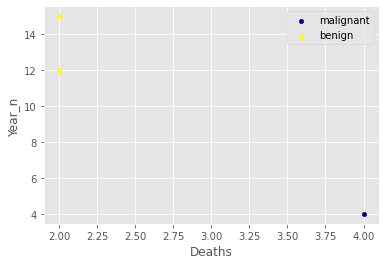

In [211]:
import matplotlib.pyplot as plt
ax = cdf1[cdf1['Deaths'] == 4][0:50].plot(kind='scatter', x='Deaths', y='Deaths', color='DarkBlue', label='malignant');
cdf1[cdf1['Deaths'] == 2][0:50].plot(kind='scatter', x='Deaths', y='Year_n', color='Yellow', label='benign', ax=ax);
plt.show()

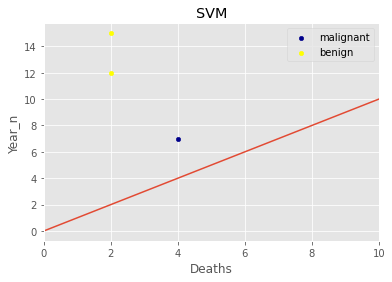

In [212]:
ax = cdf1[cdf1['Deaths'] == 4][0:50].plot(kind='scatter', x='Deaths', y='Year_n', color='DarkBlue', label='malignant');
cdf1[cdf1['Deaths'] == 2][0:50].plot(kind='scatter', x='Deaths', y='Year_n', color='Yellow', label='benign', ax=ax);
 
xfit = np.linspace(0, 10)
plt.plot(xfit,xfit)
plt.fill_between(xfit,xfit,
                alpha=0)
plt.xlim(0, 10);
plt.title('SVM')
plt.show()

In [214]:
cdf1.dtypes

Year_n       int64
Country_n    int32
EVD_n        int32
Cases_n      int64
Deaths       int64
dtype: object

In [219]:
import numpy as np
feature_df = cdf1[['Year_n', 'Country_n', 'EVD_n', 'Cases_n']]
X = np.asarray(feature_df)
X[0:4]

array([[17,  2,  3, 13],
       [16,  3,  5, 11],
       [15,  4,  5,  3],
       [14,  6,  4,  0]], dtype=int64)

In [221]:
cdf1['Deaths'] = cdf1['Deaths'].astype('int')
y = np.asarray(cdf1['Deaths'])
y [0:4]

array([14, 12,  2,  0])

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (22, 4) (22,)
Test set: (6, 4) (6,)


In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [224]:
yhat = clf.predict(X_test)
yhat [0:4]

array([13, 18,  0, 18])

In [225]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [226]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0

Confusion matrix, without normalization
[[0 0]
 [0 0]]


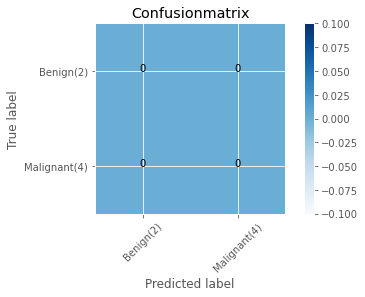

In [229]:

cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False, title='Confusionmatrix')

In [230]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.0

In [231]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average='weighted')

0.0

</b>Question Five</b>

In [235]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [238]:
cdf1

,Year_n,Country_n,EVD_n,Cases_n,Deaths
2,17,2,3,13,14
4,16,3,5,11,12
5,15,4,5,3,2
6,14,6,4,0,0
7,13,11,4,0,0
8,13,13,4,0,0
9,13,14,4,1,1
10,13,9,4,0,0
11,13,7,4,3,3
12,13,8,4,6,5


</b>Lets define X, and y for our dataset:</b>

In [258]:
X = np.asarray(cdf1[['Year_n', 'Country_n', 'EVD_n', 'Cases_n']])
X[0:5]

array([[17,  2,  3, 13],
       [16,  3,  5, 11],
       [15,  4,  5,  3],
       [14,  6,  4,  0],
       [13, 11,  4,  0]], dtype=int64)

In [259]:
y = np.asarray(cdf1['Deaths'])
y [0:5]

array([14, 12,  2,  0,  0])

</b>Also, we normalize the dataset:</b>

In [260]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.58, -1.17,  0.05,  0.95],
       [ 1.38, -0.97,  1.31,  0.64],
       [ 1.18, -0.77,  1.31, -0.61],
       [ 0.98, -0.38,  0.68, -1.08],
       [ 0.78,  0.6 ,  0.68, -1.08]])

</b>Train/Test dataset</b>

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (22, 4) (22,)
Test set: (6, 4) (6,)


</b>Modeling (Logistic Regression with Scikit-learn)</b>

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

</b>Now we can predict using the test set:</b>

In [246]:
yhat = LR.predict(X_test)
yhat

array([15, 18,  1, 18,  0,  0])

In [262]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.06, 0.06, 0.06, 0.06],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.06, 0.06, 0.06, 0.06],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.06, 0.06, 0.06, 0.06],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.06, 0.06, 0.06, 0.06],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.06, 0.06, 0.06, 0.06],
       [0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06,
        0.06, 0.06, 0.06, 0.06, 0.06]])

In [295]:
from sklearn.metrics import jaccard_score
#jaccard_score(Deaths, yhat)

</b>Calculate accuracy and F1 for Support Vector Machine</b>

</b>Question Three</b>

In [265]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [266]:
cdf1.head()

,Year_n,Country_n,EVD_n,Cases_n,Deaths
2,17,2,3,13,14
4,16,3,5,11,12
5,15,4,5,3,2
6,14,6,4,0,0
7,13,11,4,0,0


In [268]:
inputs_n

,Year_n,Country_n,EVD_n,Cases_n
2,17,2,3,13
4,16,3,5,11
5,15,4,5,3
6,14,6,4,0
7,13,11,4,0
8,13,13,4,0
9,13,14,4,1
10,13,9,4,0
11,13,7,4,3
12,13,8,4,6


In [269]:
target

2     14
4     12
5      2
6      0
7      0
8      0
9      1
10     0
11     3
12     5
17    10
18     2
19     8
20     1
21     7
22    13
23    16
24     6
25     4
30    17
31     1
34    18
35     0
36    11
37     9
38     1
39    15
40    19
Name: Deaths, dtype: int64

In [270]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [271]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [272]:
model.score(inputs_n,target)

1.0

</b>Set up the DT</b>

In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

In [275]:
# Create Entropy
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [276]:
DeathsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [277]:
predTree =DeathsTree.predict(X_trainset)

In [278]:
print(predTree [0:5])
print(y_trainset [0:5])

[11  7  0  0  1]
[11  7  0  0  1]


In [279]:
from sklearn import metrics

In [281]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pydotplus


The following NEW packages will be INSTALLED:

  cairo              conda-forge/win-64::cairo-1.16.0-h63a05c6_1001
  expat              conda-forge/win-64::expat-2.4.8-h39d44d4_0
  fribidi            conda-forge/win-64::fribidi-1.0.10-h8d14728_0
  getopt-win32       conda-forge/win-64::getopt-win32-0.1-h8ffe710_0
  gettext            conda-forge/win-64::gettext-0.19.8.1-ha2e2712_1008
  glib               conda-forge/win-64::glib-2.72.1-h7755175_0
  glib-tools         conda-forge/win-64::glib-tools-2.72.1-h7755175_0
  graphite2          pkgs/main/win-64::graphite2-1.3.14-hd77b12b_1
  graphviz           conda-forge/win-64::graphviz-2.50.0-had6c3a3_2
  gts                conda-forge/win-64::gts-0.7.6-h7c369d9_2
  harfbuzz           pkgs/main/win-64::harfbuzz-4.3.0-hda2c7e1_0
  libffi             conda-forge/win-64::libffi-3.4.2-h8ffe710_



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3





  pcre               conda-forge/win-64::pcre-8.45-h0e60522_0
  pixman             conda-forge/win-64::pixman-0.38.0-hfa6e2cd_1003
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhaef67bd_5
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1


Preparing transaction: ...working... done
Verifying transaction: ...working... failed
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python-graphviz-0.20.1     |     pyh22cad53_0          35 KB  conda-forge
    ------------------------------------------------------------
                                           Total:    



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [291]:
!pip install --upgrade scikit-learn==0.20.3

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-0.20.3.tar.gz (11.8 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\A265820\\AppData\\Local\\Temp\\pip-install-thv1pt6b\\scikit-learn_497d30cd1d804afc8c5d61fab7e676c2\\setup.py'"'"'; __file__='"'"'C:\\Users\\A265820\\AppData\\Local\\Temp\\pip-install-thv1pt6b\\scikit-learn_497d30cd1d804afc8c5d61fab7e676c2\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\A265820\AppData\Local\Temp\pip-wheel-atk36hy0'
       cwd: C:\Users\A265820\AppData\Local\Temp\pip-install-thv1pt6b\scikit-learn_497d30cd1d804afc8c5d61fab7e676c2\
  Complete output (680 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:
  

In [292]:
from six import StringIO

In [294]:
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [285]:
conda install -c anaconda scikit-learn

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##






==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       haa95532_1         160 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_2         156 KB  anaconda
    conda-4.13.0               |   py39haa95532_0        1016 KB  anaconda
    openssl-1.1.1n             |       h2bbff1b_0         5.8 MB  anaconda
    scikit-learn-1.0.2         |   py39hf11a4ad_1         6.9 MB  anaconda
    ------------------------------------------------------------
                                           Total:        13.9 MB

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> anaconda::conda-4.13.0-py39haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                    

In [289]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import jaccard_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import log_loss

In [290]:
yhat_tree=DeathsTree.predict(X)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.47368421052631576  F1 is 0.4954545454545455
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         1
           7       0.33      1.00      0.50         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.33      1.00      0.50         1
          15       0.00      0.00      0.00         1
          16       0.0

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

</b>The Model is 47% accurate and therefore its not adviserble to use the DT classifier to determin death rate</b>